<a href="https://colab.research.google.com/github/JARACH-209/Deep_Learning/blob/main/DL_Assignment1_FFN_with_backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Achal Dixit | 1801007

#Feed Forward Neural Network with Backpropogation

##Implement Feed Forward Neural Network with Backpropagation, where you can specify the following in the execution time:

1. The number of layers
2. The number of nodes/layer
3. Activation function (Sigmoid/linear/tanh/ReLU) in each layer
4. The output function (Softmax/ linear)
5. Loss function (MSE/ Cross entropy)
6. Optimization function (Batch GD/Stochastic GD/ Minibatch GD/ ADAM/ RMSProp)

Take any dataset. Test the performance of your architecture. Use the same architecture in Tensor Flow and check the performance on the same dataset.





    inputs:     the number of inputs to this layer
    neurons:    the number of neurons in this layer
    activation: the activation function to use
    weights:    matrix, number of rows = number of neurons in the layer, 
                and number of columns = the number of inputs to this layer. 
    bias:       a column vector, and contains a bias value for each 
                neuron in the network. Initially, b = 0.
    
    neurons = number of neurons in the given layer
    inputs = number of inputs to the layer
    samples (or m) = number of training samples

    Input to the network, X_train.shape = (dimension of X, samples)
    
    W.shape = (neurons, inputs)
    b.shape = (neurons, 1)
    Z.shape = (neurons, samples)
    A.shape = Z.shape
    dZ.shape = Z.shape
    dW.shape = W.shape
    db.shape = b.shape
    dA.shape = A.shape

In [68]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [26]:

# Activations

def tanh(x):
    return np.tanh(x)

def d_tanh(x):                             # derivative of tanh
    return 1 - np.tanh(x)*np.tanh(x)

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):                          # derivative of sigmoid
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def d_relu(x):                             # derivative of relu
    return 1. * (x > 0)                    # at x = 0, let derivative be also 0

def linear(x):
    return x

def d_linear(x):
    x[True] = 1
    return x

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def d_softmax(x):
    s = softmax(x)
    a = np.eye(s.shape[-1])
    temp1 = np.zeros((s.shape[0], s.shape[1], s.shape[1]),dtype=np.float32)
    temp2 = np.zeros((s.shape[0], s.shape[1], s.shape[1]),dtype=np.float32)
    temp1 = np.einsum('ij,jk->ijk',s,a)
    temp2 = np.einsum('ij,ik->ijk',s,s)
    return temp1-temp2
    
    #s = 1 / (1 + np.exp(-x))
    #return s * (1 - s)


# Loss Functions

def logloss(y, a):
    return -(y*np.log(a) + (1-y)*np.log(1-a))

def d_logloss(y, a):
    return (a - y)/(a*(1 - a))

def mean_square_loss(y, a):                         # as our w = w` - delta, so we will do output-target
    return ((a-y)**2).mean()                # meaning, loss = a-y when updation is w = w` - alpha*loss

def d_mean_square_loss(y, a):
    return (2*(a-y)).mean()

Why do we take derivative of activation function?

In order to determine where that steepest slope is, you need the derivative of the activation function. Basically, you want to sort out how much each unit in your network contributes to an error, and adjust in the direction that contributes the most.

###Feed Forward 
    Z = W.A_prev + b
    A = activation(Z)


### Learning Equations

    W' = W - α(𝑑C/𝑑W)
    b' = b - α(𝑑b/𝑑W)


W'/b' = updated weight/bias

W/b = current weight/bias

α = learing rate


### Backprop Formulas

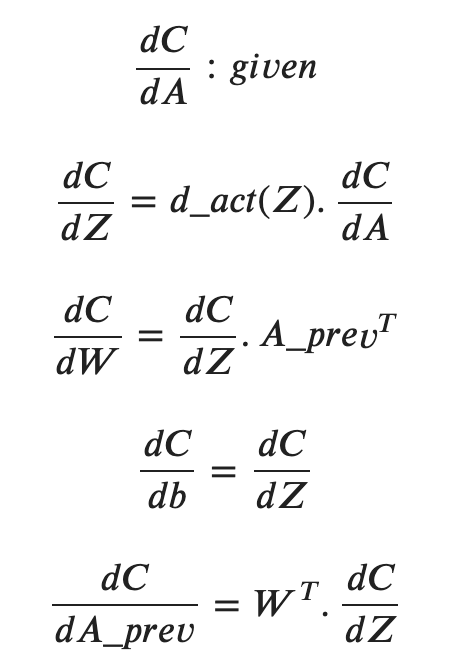


In [43]:
# Defining a layer

class Layer:
    activations = {'tanh': (tanh,d_tanh),
                   'sigmoid': (sigmoid,d_sigmoid),
                   'relu': (relu,d_relu),
                   'linear': (linear,d_linear),
                   'softmax': (softmax,d_softmax)}

    def __init__(self, inputs, neurons,activation,optimizer = None,learning_rate = 0.001):
        self.W = np.random.randn(neurons,inputs)
        self.b = np.zeros((neurons,1))
        if optimizer is None:
            self.learning_rate = learning_rate
        self.optimizer = optimizer
        if activation in self.activations.keys():
            self.act, self.d_act = self.activations.get(activation)
        else:
            print("Erroneous activation function. Ending initialization.")
            exit(0)
    def feedforward(self,A_prev):
        self.A_prev = A_prev        # Output from the previous layer. For input = X.
        self.Z = np.dot(self.W,self.A_prev) + self.b
        self.A = self.act(self.Z)

        return self.A
    
    def backprop(self, dA):
        dZ = np.multiply(self.d_act(self.Z),dA)         # Element-wise multiplication. Can't do np.dot
        dW = 1/dZ.shape[1] * np.dot(dZ, self.A_prev.T)  # dividing by dZ.shape gives average value across all dW. Normalizes the sum.
        db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims=True)      # Normalize again by taking the average. To match dimensions.
        dA_prev = np.dot(self.W.T, dZ)
        if self.optimizer is None:
        # Learning. Later this will be changed to include more optimizers.
            self.W = self.W - self.learning_rate * dW
            self.b = self.b - self.learning_rate * db
        else:
            self.W,self.b = self.optimizer.optimize(self.W,dW,self.b,db)

        return dA_prev

In [49]:
# Optimizers 

# class Optimizers:
#     def __init__(self):
#         self.name = None
#         self.learning_rate = None
#         self.alpha
#     def adam():

        
#     def getOptimizer(self,name = 'adam', learning_rate = 0.1, alpha, beta1 = 0.9, beta2 = 0.99):
#         name = name.lower()


# Direct Optimzers
class Adam:
    def __init__(self,alpha = 0.001, beta1 = 0.9, beta2 = 0.999,epsilon = 1e-8):
        self.name = "Adam"
        self.alpha = alpha
        self.beta1 = beta1
        self.beta2 = beta2
        self.wmoment = None
        self.wv = None
        self.bmoment = None
        self.bv = None
        self.t = 0
        self.epsilon = epsilon
    def optimize(self,w,dw,b,db):
        if self.wmoment is None:
            self.wmoment = np.zeros(w.shape)
            self.wv = np.zeros(w.shape)
        if self.bmoment is None:
            self.bmoment = np.zeros(b.shape)
            self.bv = np.zeros(b.shape)
        self.wmoment = self.beta1 * self.wmoment + (1-self.beta1) * dw
        self.bmoment = self.beta1 * self.bmoment + (1-self.beta1) * db
        self.wv = self.beta2 * self.wv + (1-self.beta2) * np.multiply(dw,dw)
        self.bv = self.beta2 * self.bv + (1-self.beta2) * np.multiply(db,db)
        w_mcap = self.wmoment / (1-self.beta1)
        b_mcap = self.bmoment / (1-self.beta1)
        w_vcap = self.wv / (1-self.beta2)
        b_vcap = self.bv / (1-self.beta2)
        w = w - self.alpha * w_mcap / (np.sqrt(w_vcap+self.epsilon))
        b = b - self.alpha * b_mcap / (np.sqrt(b_vcap+self.epsilon))
        return w,b

In [39]:
class Model:
    losses = {'logloss': (logloss,d_logloss),
              'cross_entropy': (logloss,d_logloss),
              'mse': (mean_square_loss,d_mean_square_loss)}
    def __init__(self,layers):
        self.layers = layers
        self.costs = []

    def compile(self, learning_rate = 0.1,loss = 'logloss',iter = 100):
        if learning_rate == 0.1:
            self.learning_rate = 0.1
        else:
            for layer in self.layers:
                layer.learning_rate = learning_rate
        self.loss,self.d_loss = self.losses.get(loss)
        self.iter = iter
        return self

    def train(self,X,y):
        self.X = X
        self.y = y
        self.m = len(y)
        self.costs = []

        for i in range(self.iter):
            # Feedforward

            A = X
            for layer in self.layers:
                A = layer.feedforward(A)
            
            # Cost calculation
            cost = (1/self.m)*np.sum(self.loss(y,A))      
            self.costs.append(cost)
            print(f"Iter: {i} \t loss:{cost}")

            # Backpropogation
            dA = self.d_loss(y,A)
            for layer in reversed(self.layers):
                dA = layer.backprop(dA)
        print("Training complete successfully")

        return self

    def predict(self,X):
        A = X
        for layer in self.layers:
            A = layer.feedforward(A)
        return A

Training the NN on a dataset

In [69]:
X = load_iris().data
y = load_iris().target

# encode class values as integers. One hot encoding for multi-class classification
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

''' One hot encoding works becayse y-A is possible as long as dims are same.'''

x_train, x_test, y_train, y_test = train_test_split(X,dummy_y,test_size = .4,random_state =0)
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Changing shapes of dataset to accomodate the coding changes

#y_t = np.array([y_train]) # 1 x m
y_t = y_train.T
x_t = x_train.T
print(x_t.shape,y_t.shape)

(4, 90) (3, 90)


In [80]:
inputs = 4
learning_rate = 0.001
layers = [Layer(inputs, 5, 'tanh'),
          Layer(5, 5, 'relu'), 
          Layer(5, 3, 'sigmoid')]

model = Model(layers)
model.compile(learning_rate = learning_rate, loss='logloss', iter=1000)
model.train(x_train.T,y_t)

Iter: 0 	 loss:139.69729536435767
Iter: 1 	 loss:139.220079808415
Iter: 2 	 loss:138.74420342849155
Iter: 3 	 loss:138.27078628520593
Iter: 4 	 loss:137.7992429493554
Iter: 5 	 loss:137.32956928219582
Iter: 6 	 loss:136.86160057442055
Iter: 7 	 loss:136.39454469831605
Iter: 8 	 loss:135.92934956171126
Iter: 9 	 loss:135.4660111134065
Iter: 10 	 loss:135.00452532253615
Iter: 11 	 loss:134.54528099430735
Iter: 12 	 loss:134.08852235160546
Iter: 13 	 loss:133.63359913330817
Iter: 14 	 loss:133.18050734807508
Iter: 15 	 loss:132.72924302478714
Iter: 16 	 loss:132.27980221244343
Iter: 17 	 loss:131.83218098004843
Iter: 18 	 loss:131.38637541649018
Iter: 19 	 loss:130.94234507829174
Iter: 20 	 loss:130.50024129955898
Iter: 21 	 loss:130.0596115363899
Iter: 22 	 loss:129.6196101568849
Iter: 23 	 loss:129.18004421762626
Iter: 24 	 loss:128.74227482592127
Iter: 25 	 loss:128.30629822739073
Iter: 26 	 loss:127.87211068653585
Iter: 27 	 loss:127.43970848652981
Iter: 28 	 loss:127.00908792899818
I

In [ ]:
y_hat = model.predict(x_test.T)
y_hat.T[:5]         # As the dim is (3,m)

array([[0.01256974, 0.25511389, 0.89903315],
       [0.19166585, 0.86664006, 0.05889792],
       [0.94083886, 0.13730746, 0.02123981],
       [0.01309343, 0.28584701, 0.81121427],
       [0.94500138, 0.14580407, 0.02031665]])

In [ ]:
y_test[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
y_hat = y_hat.T.reshape((60,3))
for i,k in enumerate(y_hat):
    temp = np.argmax(y_hat[i])
    y_hat[i][True] = 0
    y_hat[i][temp] = 1
y_hat[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
accuracy_score(y_test,y_hat)

0.8833333333333333

In [ ]:
import tensorflow as tf
accuracy = tf.keras.metrics.CategoricalAccuracy()
accuracy.update_state(y_test,y_hat)
accuracy.result().numpy()

0.8833333

Text(0.5, 1.0, 'FF-NN with SGD')

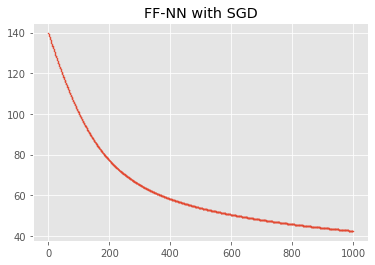

In [82]:
plt.scatter(range(len(model.costs)),model.costs,s=1)
plt.title("FF-NN with SGD")

Using ADAM

In [84]:
inputs = 4
learning_rate = 0.1
layers = [Layer(inputs, 5, 'tanh',optimizer = Adam(alpha = 0.001,beta1 = 0.9,beta2=0.99,epsilon = 1e-8)),
          Layer(5, 5, 'relu',optimizer = Adam(alpha = 0.001,beta1 = 0.9,beta2=0.99,epsilon = 1e-8)), 
          Layer(5, 3, 'sigmoid',optimizer = Adam(alpha = 0.001,beta1 = 0.9,beta2=0.99,epsilon = 1e-8))]

model = Model(layers)
model.compile(learning_rate = learning_rate, loss='logloss', iter=1000)
model.train(x_train.T,y_t)

Iter: 0 	 loss:176.3864433844257
Iter: 1 	 loss:175.5108265170179
Iter: 2 	 loss:174.35244373228693
Iter: 3 	 loss:173.0183060410299
Iter: 4 	 loss:171.55548318035437
Iter: 5 	 loss:170.01239310008467
Iter: 6 	 loss:168.41341374556762
Iter: 7 	 loss:166.7857024543096
Iter: 8 	 loss:165.13795037211145
Iter: 9 	 loss:163.48530734322202
Iter: 10 	 loss:161.83703428788124
Iter: 11 	 loss:160.22274395266598
Iter: 12 	 loss:158.6177475847594
Iter: 13 	 loss:157.02676717334543
Iter: 14 	 loss:155.45843895664484
Iter: 15 	 loss:153.90601016448687
Iter: 16 	 loss:152.37699652013535
Iter: 17 	 loss:150.86505805976682
Iter: 18 	 loss:149.37149908886295
Iter: 19 	 loss:147.89727900473883
Iter: 20 	 loss:146.44458512765556
Iter: 21 	 loss:145.01728964326685
Iter: 22 	 loss:143.6090436443418
Iter: 23 	 loss:142.22115508095357
Iter: 24 	 loss:140.85369713389403
Iter: 25 	 loss:139.50662791188802
Iter: 26 	 loss:138.17964961406756
Iter: 27 	 loss:136.8727448910019
Iter: 28 	 loss:135.58565466563226
It

Text(0.5, 1.0, 'FF-NN with Adam')

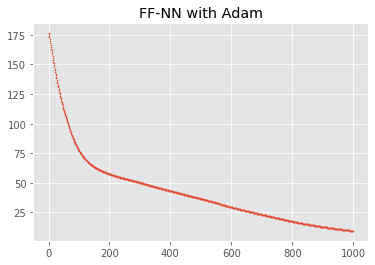

In [85]:
plt.scatter(range(len(model.costs)),model.costs,s=1)
plt.title("FF-NN with Adam")

In [53]:
y_hat = model.predict(x_test.T)
y_hat = y_hat.T.reshape((60,3))
for i,k in enumerate(y_hat):
    temp = np.argmax(y_hat[i])
    y_hat[i][True] = 0
    y_hat[i][temp] = 1

accuracy_score(y_test,y_hat)

0.9333333333333333

Trying a regression example


In [54]:
from sklearn.datasets import load_diabetes

X = load_diabetes().data
y = load_diabetes().target

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .4,random_state =0)

# scaler = StandardScaler().fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

y_train = y_train.reshape((-1,1))

y_t = y_train.T
x_t = x_train.T
x_t.shape

(10, 265)

In [ ]:
y_t.shape

(1, 265)

In [ ]:
#Facing a problem of vanishing gradient. Unstable performance.

inputs = 10
learning_rate = 0.0001
loss = 'mse'
layers = [Layer(inputs, 20, 'relu'),
          Layer(20, 20, 'relu'),
          Layer(20, 1, 'linear')]

model = Model(layers)
model.compile(learning_rate = learning_rate, loss=loss, iter=200)
model.train(x_t,y_t)

Iter: 0 	 loss:29741.837872534383
Iter: 1 	 loss:29524.0650665287
Iter: 2 	 loss:29385.45462600062
Iter: 3 	 loss:29269.649531086627
Iter: 4 	 loss:29156.164477233655
Iter: 5 	 loss:29024.720823409512
Iter: 6 	 loss:28862.518827306758
Iter: 7 	 loss:28651.479100968107
Iter: 8 	 loss:28373.601069062857
Iter: 9 	 loss:28018.380950337803
Iter: 10 	 loss:27555.769452992066
Iter: 11 	 loss:26963.75213823005
Iter: 12 	 loss:26186.182179403833
Iter: 13 	 loss:25160.234740269596
Iter: 14 	 loss:23846.155251915516
Iter: 15 	 loss:22225.82316031237
Iter: 16 	 loss:20273.544605890947
Iter: 17 	 loss:18003.304599532585
Iter: 18 	 loss:15496.954361587288
Iter: 19 	 loss:12940.645694869647
Iter: 20 	 loss:10612.876936152012
Iter: 21 	 loss:8796.371206327334
Iter: 22 	 loss:7629.2460084776185
Iter: 23 	 loss:7027.432898169785
Iter: 24 	 loss:6778.509078105378
Iter: 25 	 loss:6693.953858402226
Iter: 26 	 loss:6669.619216763081
Iter: 27 	 loss:6663.667923625825
Iter: 28 	 loss:6662.557253301673
Iter: 2

In [ ]:
y_hat = model.predict(x_test.T)
y_hat.T[:5]         # As the dim is (3,m)

array([[152.38113208],
       [152.38113208],
       [152.38113208],
       [152.38113208],
       [152.38113208]])

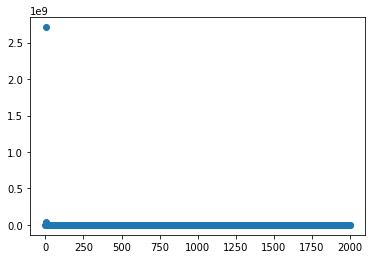

In [ ]:
plt.scatter(range(len(model.costs)),model.costs)

In [59]:
inputs = 10
learning_rate = 0.0001
loss = 'mse'
layers = [Layer(inputs, 200, 'relu',optimizer = Adam(alpha = 0.001,beta1 = 0.9,beta2=0.99,epsilon = 1e-8)),
          Layer(200, 200, 'relu',optimizer = Adam(alpha = 0.001,beta1 = 0.9,beta2=0.99,epsilon = 1e-8)),
          Layer(200, 1, 'linear',optimizer = Adam(alpha = 0.001,beta1 = 0.9,beta2=0.99,epsilon = 1e-8))]

model = Model(layers)
model.compile(learning_rate = learning_rate, loss=loss, iter=1000)
model.train(x_t,y_t)

Iter: 0 	 loss:27301.188411369127
Iter: 1 	 loss:26841.188559186805
Iter: 2 	 loss:26226.47056600415
Iter: 3 	 loss:25514.888822172525
Iter: 4 	 loss:24739.495095370054
Iter: 5 	 loss:23922.570177027148
Iter: 6 	 loss:23079.919323057013
Iter: 7 	 loss:22223.11692385244
Iter: 8 	 loss:21359.360751797758
Iter: 9 	 loss:20494.421587499015
Iter: 10 	 loss:19634.048965760234
Iter: 11 	 loss:18785.47765872257
Iter: 12 	 loss:17950.31932813677
Iter: 13 	 loss:17128.934167000454
Iter: 14 	 loss:16325.24616627613
Iter: 15 	 loss:15541.701627632652
Iter: 16 	 loss:14780.220122114399
Iter: 17 	 loss:14042.662947154819
Iter: 18 	 loss:13330.77409454922
Iter: 19 	 loss:12645.327298541908
Iter: 20 	 loss:11987.349566640287
Iter: 21 	 loss:11359.006748399754
Iter: 22 	 loss:10761.979753758285
Iter: 23 	 loss:10196.343885415088
Iter: 24 	 loss:9662.838864585427
Iter: 25 	 loss:9162.26026204207
Iter: 26 	 loss:8695.352070635689
Iter: 27 	 loss:8263.852021454264
Iter: 28 	 loss:7868.591547953851
Iter: 2

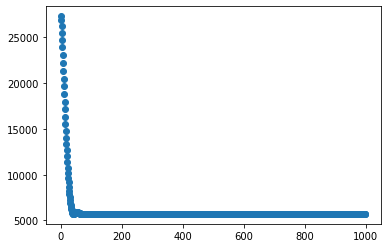

In [60]:
plt.scatter(range(len(model.costs)),model.costs)